# Intern at Sparks Foundation

# Prediction using Supervised Learning.

Predicting the Exam score of an student based on the number of study hours.

Hours - Independent Variable     

Score - Dependent Variable which depends on Hours

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('student_scores.csv')
print("The Shape is: ",df.shape) #Shape of the dataset i.e total rows and columns
df.head()                        

The Shape is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.columns                       #columns will give the column Names 

Index(['Hours', 'Scores'], dtype='object')

In [5]:
df.describe()                    #Gives the statistical summary

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the data using Matplotlib-Scatterplot

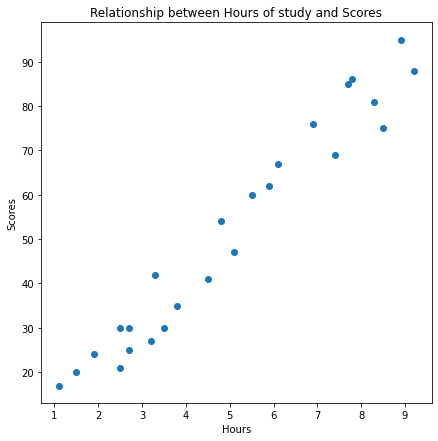

In [6]:
fig =plt.figure(figsize=(7,7))
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.title('Relationship between Hours of study and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#From the above scatter plot we can understand that this belong to positive linear direction

# In this section we will see

#importing Linear Regression Model.
#Dividing a data for Training and Testing
#Evaluate a score by cross-validation

In [9]:
#Importing linear regression from linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['Hours']],df['Scores'],test_size = 0.2,random_state=0)

In [19]:
 x_train.shape, y_train.shape

((20, 1), (20,))

In [20]:
x_test.shape, y_test.shape


((5, 1), (5,))

In [21]:
from sklearn.model_selection import KFold,cross_val_score
fold = KFold(n_splits=5,random_state=0, shuffle=True)
scores = cross_val_score(model, x_train, y_train,scoring='r2', cv=fold)
scores.mean()

0.8948738034210175

In [22]:
model=model.fit(x_train,y_train)

# Predicted Result

In [23]:
Predicted_result=model.predict(x_test)
Predicted_result

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Mean Absolute Error 

 #The sum of absolute differences between our target and predicted variables

In [35]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test,Predicted_result))

Mean Absolute Error: 4.183859899002982


# r2_score

#It is a statistical Measure of how close the data are fitted to regression line

In [36]:
from sklearn.metrics import r2_score
print("r2_score:",r2_score(y_test,Predicted_result))

r2_score: 0.9454906892105354


# Best Fit Line Using Straight line Formula

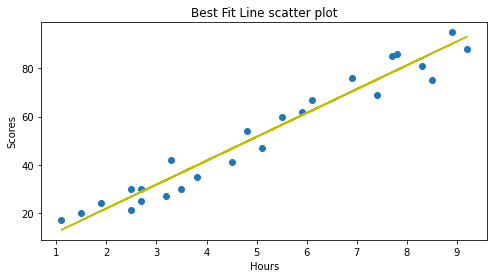

In [30]:
y=model.coef_*df[['Hours']]+model.intercept_   #Y=mx+c
figure = plt.figure(figsize=(8,4))
plt.scatter(df['Hours'],df['Scores'])
plt.plot(df['Hours'],y,'y')                       #plotting Best fit Line whereas Y is straight line
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Best Fit Line scatter plot")
plt.show()

In [31]:
#comparing  actual and predicted values
comp=pd.DataFrame({'Actual':y_test,'Predicted':Predicted_result})
comp

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


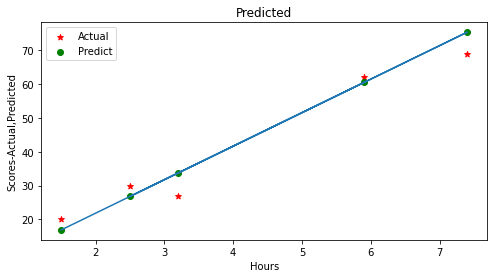

In [32]:
plt.figure(figsize=(8,4))
plt.scatter(x_test,y_test,c='red',marker='*',label='Actual')      #Scatter plot using Test Data(x and y)
plt.scatter(x_test,Predicted_result,c='green',label='Predict')    #Scatter plot using Data(x and predicted_result)
plt.plot(x_test,Predicted_result)                                 #plotting the Line(x and predicted_result)
plt.xlabel('Hours')
plt.ylabel('Scores-Actual,Predicted')
plt.title('Predicted')
plt.legend()

# Predicting the Score for Studying 9.25Hours per day 

In [33]:
print("Student studied 9.25Hours per day will get {} Score".format(model.predict(np.array(9.25).reshape(1,1))))

Student studied 9.25Hours per day will get [93.69173249] Score


# Hence we can conclude that Student who studied 9.25Hours-per-day will get 93.69173249 Score